## **Random Forest**
### i) supervised machine learning algorithm
  

  training set: labeled input


  test set: unlabeled data
### ii)steps:
  

Step 1: Select random samples from a given data or training set.

Step 2: This algorithm will construct a decision tree for every training data.

Step 3: Voting will take place by averaging the decision tree.

Step 4: Finally, select the most voted prediction result as the final prediction result.

### **Import Libraries**:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**:

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd 
data=pd.read_csv('/content/gdrive/MyDrive/machine learning/diabetes.csv')

In [4]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **DataSet Description:**


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test


BloodPressure: Diastolic blood pressure (mm Hg)


SkinThickness: Triceps skinfold thickness (mm)


Insulin: 2-Hour serum insulin (mu U/ml)


BMI: Body mass index (weight in kg/(height in m)^2)


Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.


Age: Age in years


Class: Class variable (0: the person is not diabetic or 1: the person is diabetic

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




*   The average number of Pregnancies are 4.
*   Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which seems like an error and should be explore later.
*   Pregnancies, SkinThickness, Insulin and Age have major difference between 75% and maximum value. This represent the chances of outliers in the data.


### **Zero_data replacement**:

0 ---> MaN ----> mean of the col

In [6]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
  ## panads data fram always has a col name. (First line)
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
# Get all the data in the first eight columns
X = data.iloc[:,0:8]
### print(X)

In [8]:
# label
y = data.iloc[:,8]
###print(y)

### **Plot heatmap and find linear correlated features.**

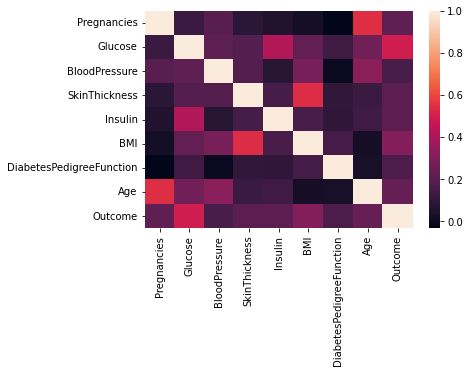

In [9]:
sns.heatmap(data.corr())

### **Split training and teseing set**:

In [10]:
#import train_test_split from sklearn
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

### Decision tree:

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',
               min_samples_leaf=5,
               min_samples_split=5,
               max_depth=None)


# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [18]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[126  31]
 [ 29  45]]
0.6


In [19]:
print(accuracy_score(y_test,y_pred))

0.7402597402597403


In [37]:
acc = np.zeros((9,2))
#print(acc)
list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i,j in enumerate(list):
  #print(j)
  #print(i)
  X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=j,random_state=0)
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(criterion='gini',
               min_samples_leaf=5,
               min_samples_split=5,
               max_depth=None)


  # Train Decision Tree Classifer
  clf.fit(X_train,y_train)

  #Predict the response for test dataset
  y_pred = clf.predict(X_test)

  acc[i] = (j,accuracy_score(y_test,y_pred))
print(acc)

[[0.1        0.74025974]
 [0.2        0.68831169]
 [0.3        0.74025974]
 [0.4        0.73701299]
 [0.5        0.75260417]
 [0.6        0.72668113]
 [0.7        0.67657993]
 [0.8        0.68780488]
 [0.9        0.71820809]]


Text(0.5, 1.0, 'acc with different K')

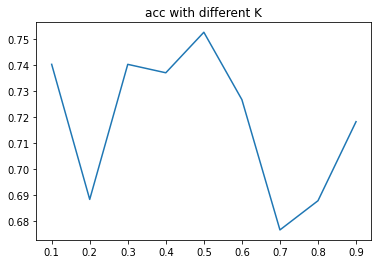

In [38]:
xs = [x[0] for x in acc]
ys = [x[1] for x in acc]
plt.plot(xs, ys)
plt.title('acc with different K')